In [4]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/abhishek14398/salary-dataset-simple-linear-regression/versions/1


In [3]:
csv_file = "/root/.cache/kagglehub/datasets/abhishek14398/salary-dataset-simple-linear-regression/versions/1/Salary_dataset.csv"
data = pd.read_csv(csv_file)
print(data.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [8]:
X = data[["YearsExperience"]]
y = data["Salary"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [12]:
y_pred = ridge_model.predict(X_test)

In [13]:
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

R²: 0.9021627846740264


In [14]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R²: {adjusted_r2}")

Adjusted R²: 0.877703480842533


BEST FIT LINE

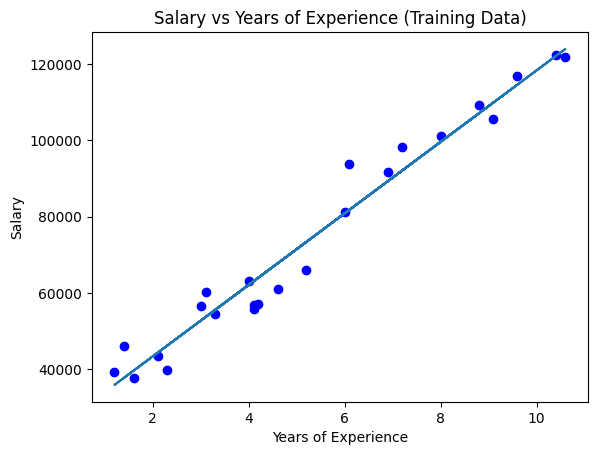

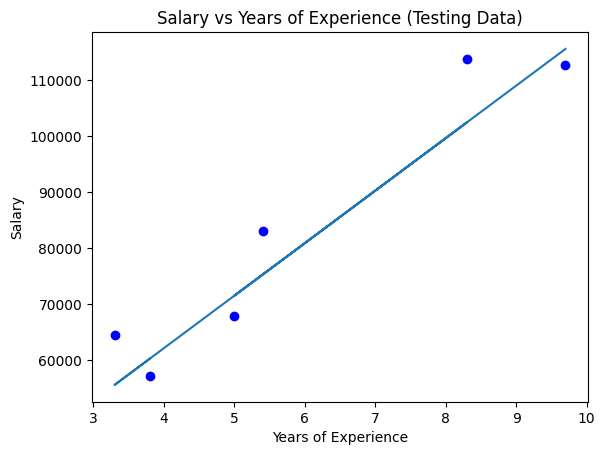

In [17]:
# Training data 
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, ridge_model.predict(X_train))
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience (Training Data)")
plt.show()

# Testing data 
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, ridge_model.predict(X_test))
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience (Testing Data)")
plt.show()

In [16]:
new_point= np.array([[4]])
predicted_salary = ridge_model.predict(new_point)
print(f"Prediced salary for 4 years: {round(predicted_salary[0],2)}")

Prediced salary for 4 years: 62136.06


/usr/local/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
